<a href="https://colab.research.google.com/github/paulo-lins/Sales-Analysis/blob/main/sale_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Analysis**
### Import necessary libraries

In [1]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
#pd.options.mode.chained_assignment = None 

### Questions:
#### - 1: What was the best month for Sales?
#### R. December
#### - 2: What city had the highest number of sales?
#### R. San Francisco
#### - 3: What time should we display advertisements to maximize likehood of customer´s buying product?
#### R. My recommendation is between 11am and 12pm and between 18pm and 19pm
#### - 4: What products are most often sold together?

### 1 - Merge the 12 months of sales data into a single CSV file

In [2]:
#Python method listdir() returns a list containing the 
#names of the entries in the directory given by path.(font: 'https://www.tutorialspoint.com/python/os_listdir.htm')

#files = [file for file in os.listdir('./Sales_Data')]

#we create an empty data frame 'all_months_data'


#all_months_data = pd.DataFrame()

#for file in files:
    #df = pd.read_csv("./Sales_Data/"+file)
    #all_months_data = pd.concat([all_months_data, df])

#all_months_data.to_csv("./Sales_Data/all_data.csv", index=False)

### Read updated CSV file with all data

In [3]:
all_data = pd.read_csv("/content/drive/MyDrive/DATA-SCIENCE/sale_analysis/data/all_data.csv")

In [4]:
df2 = all_data
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
934244,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
934245,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
934246,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
934247,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Clean up the Data

In [5]:
all_data.isna().sum()

Order ID            2724
Product             2724
Quantity Ordered    2724
Price Each          2724
Order Date          2724
Purchase Address    2724
dtype: int64

#### Drop nan rows

In [6]:
nan_df = all_data[all_data.isna().any(axis=1)]

In [7]:
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
all_data = all_data.dropna(how='all')

#### Create a Month column

In [9]:
# create a Month column
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


### Find 'Or' and delete it

In [10]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### Convert columns to the correct type

In [11]:
# here we hace "Unable to parse string "Or" at position 517"
all_data['Month'] = pd.to_numeric(all_data['Month']) #to numerical
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])# make datetime
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #make int
all_data['Price Each'] = all_data['Price Each'].astype('float64') #make float

### **- 1: What was the best month for Sales?**
### R. We can clearly see that **december** is the best month for sales.

#### Let's create a 'Sales' column. In it we will show the total value of sales for each month

In [12]:
all_data['Sales'] =  all_data['Quantity Ordered'] * all_data['Price Each']
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,54515,9058841.90,9111283.65
2,67245,10944423.60,11010112.10
3,85025,13956039.15,14035501.90
4,102790,16838355.10,16953351.20
5,93335,15675625.65,15763033.75
6,76265,12810128.05,12889011.30
7,80360,13162697.80,13238878.80
8,67240,11151727.10,11222339.40
9,65545,10424960.45,10487800.65


### **- 2: What city had the highest number of sales?**
### R. San Francisco, CA with a US$ 41311019.55 in orders.

In [13]:
# Add a city column
# let´s use apply

all_data['city'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + x.split(',')[2][0:3])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [14]:
# Using groupby and sum, we´ll answer the question 2
results = all_data[['city', 'Sales']].groupby('city').sum()
results

,Sales
city,
Atlanta GA,13977492.90
Austin TX,9097908.75
Boston MA,18308210.05
Dallas TX,13839877.00
Los Angeles CA,27262854.00
New York City NY,23321587.15
Portland ME,2248791.35
Portland OR,9353661.70
San Francisco CA,41311019.55


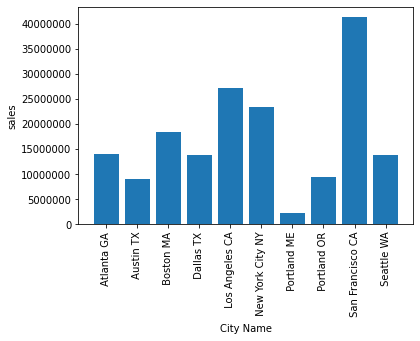

In [15]:
cities = [city for city, df in all_data.groupby('city')]
fig, ax = plt.subplots()
ax.yaxis.get_major_formatter().set_scientific(False)
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation=90)
plt.xlabel('City Name')
plt.ylabel('sales');


### **- 3 What time should we display advertisements to maximize likehood of customer´s buying product?**
### R. My recommendation is between 11am and 12pm and between 6pm and 7pm

In [16]:
# We can look at the column 'Order date' and distribute the times in 24 hours with more sales
# hours = sales['date'].hour
all_data['hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


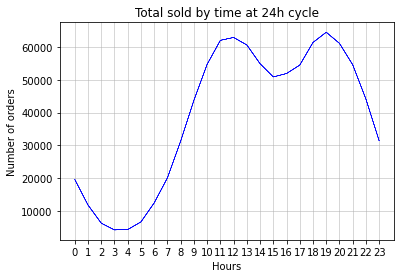

In [17]:
# Plotting hours versus number of orders can be a good way to see what hours most sales are made
hours = [hour for hour, df in all_data.groupby('hour')]

plt.grid(linestyle='-', linewidth=0.5)
plt.plot(hours, all_data.groupby(['hour']).count(), linewidth=0.3, color='b')
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Number of orders")
plt.title("Total sold by time at 24h cycle");

### **- 4: What products are most often sold together?**

In [43]:
all_data['Order ID'] = (all_data['Order ID']).astype('int32')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929750 entries, 0 to 934248
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          929750 non-null  int32         
 1   Product           929750 non-null  object        
 2   Quantity Ordered  929750 non-null  int64         
 3   Price Each        929750 non-null  float64       
 4   Order Date        929750 non-null  datetime64[ns]
 5   Purchase Address  929750 non-null  object        
 6   Month             929750 non-null  int64         
 7   Sales             929750 non-null  float64       
 8   city              929750 non-null  object        
 9   hour              929750 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(3)
memory usage: 74.5+ MB


In [52]:
# Let´s see the Order ID (if different products have the same order ID, they were purchased together)
# We´ll check the duplicateds
all_data[all_data['Order ID'].duplicated(keep=False)]

#df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,hour


In [26]:
#df